# Social media vs Coffee consumption analysis

## Exploring the Link Between digital Habits and caffeine Intake

This Jupyter Notebook explores a weird connection between an individual's preferred social media platform and their daily coffee consumption. Using the "Social Media vs. Productivity" dataset from Kaggle, we aim to uncover patterns, potential correlations, and insights into how our digital habits might influence our reliance on caffeine.

### Project Goal:
To determine if there's a relationship between the specific social media application a person prefers and their average daily coffee consumption.

# loading our data and check

In [1]:
import pandas as pd

df=pd.read_csv('social_media_vs_productivity.csv')
print("First 5 rows of the dataset")
df.head(5)

First 5 rows of the dataset


,age,gender,job_type,daily_social_media_time,social_platform_preference,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
0,56,Male,Unemployed,4.180940,Facebook,61,6.753558,8.040464,7.291555,4.0,5.116546,0.419102,8,False,False,4,11,21.927072,6.336688
1,46,Male,Health,3.249603,Twitter,59,9.169296,5.063368,5.165093,7.0,5.103897,0.671519,7,True,True,2,25,0.000000,3.412427
2,32,Male,Finance,NaN,Twitter,57,7.910952,3.861762,3.474053,4.0,8.583222,0.624378,0,True,False,3,17,10.322044,2.474944
3,60,Female,Unemployed,NaN,Facebook,59,6.355027,2.916331,1.774869,6.0,6.052984,1.204540,1,False,False,0,4,23.876616,1.733670
4,25,Male,IT,NaN,Telegram,66,6.214096,8.868753,NaN,7.0,5.405706,1.876254,1,False,True,1,30,10.653519,9.693060


In [2]:
print("\ndataframe info")
df.info()
print("\nmissing values before cleaning")
df.isnull().sum()


dataframe info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             30000 non-null  int64  
 1   gender                          30000 non-null  object 
 2   job_type                        30000 non-null  object 
 3   daily_social_media_time         27235 non-null  float64
 4   social_platform_preference      30000 non-null  object 
 5   number_of_notifications         30000 non-null  int64  
 6   work_hours_per_day              30000 non-null  float64
 7   perceived_productivity_score    28386 non-null  float64
 8   actual_productivity_score       27635 non-null  float64
 9   stress_level                    28096 non-null  float64
 10  sleep_hours                     27402 non-null  float64
 11  screen_time_before_sleep        27789 non-null  float64
 12  breaks_during_wo

age                                  0
gender                               0
job_type                             0
daily_social_media_time           2765
social_platform_preference           0
number_of_notifications              0
work_hours_per_day                   0
perceived_productivity_score      1614
actual_productivity_score         2365
stress_level                      1904
sleep_hours                       2598
screen_time_before_sleep          2211
breaks_during_work                   0
uses_focus_apps                      0
has_digital_wellbeing_enabled        0
coffee_consumption_per_day           0
days_feeling_burnout_per_month       0
weekly_offline_hours                 0
job_satisfaction_score            2730
dtype: int64

# cleaning our data and pre processing it

In [5]:
# columns identified with missing values and we impute them
numerical_cols_to_impute = [
    'daily_social_media_time',
    'perceived_productivity_score',
    'actual_productivity_score',
    'stress_level',          
    'sleep_hours',           
    'screen_time_before_sleep',
    'job_satisfaction_score'
]

print("Imputation with Median")
for col in numerical_cols_to_impute:
    if df[col].isnull().any():
        median_val = df[col].median()
        df.loc[:, col] = df[col].fillna(median_val)
        print(f"Filled NaN in '{col}' with median: {median_val:.2f}")

# verification
print("\nMissing Values Count After Cleaning")
df.isnull().sum() # updated NaN checker

Imputation with Median

Missing Values Count After Cleaning


age                               0
gender                            0
job_type                          0
daily_social_media_time           0
social_platform_preference        0
number_of_notifications           0
work_hours_per_day                0
perceived_productivity_score      0
actual_productivity_score         0
stress_level                      0
sleep_hours                       0
screen_time_before_sleep          0
breaks_during_work                0
uses_focus_apps                   0
has_digital_wellbeing_enabled     0
coffee_consumption_per_day        0
days_feeling_burnout_per_month    0
weekly_offline_hours              0
job_satisfaction_score            0
dtype: int64

# calculating the main statistics like avg, median and no of users per platform that will answer our question

In [6]:
print("average daily coffee consumption by social media platform preference")
avg_coffee_by_platform = df.groupby('social_platform_preference')['coffee_consumption_per_day'].mean().sort_values(ascending=False)
print(avg_coffee_by_platform)
print("\nmedian daily coffee consumption by social platform preference")
median_coffee_by_platform = df.groupby('social_platform_preference')['coffee_consumption_per_day'].median().sort_values(ascending=False)
print(median_coffee_by_platform)
print("\nnumber of users per social platform preference")
platform_counts = df['social_platform_preference'].value_counts()
print(platform_counts)

average daily coffee consumption by social media platform preference
social_platform_preference
Twitter      2.036050
Facebook     1.992400
Instagram    1.991009
Telegram     1.989024
TikTok       1.988353
Name: coffee_consumption_per_day, dtype: float64

median daily coffee consumption by social platform preference
social_platform_preference
Facebook     2.0
Instagram    2.0
Telegram     2.0
TikTok       2.0
Twitter      2.0
Name: coffee_consumption_per_day, dtype: float64

number of users per social platform preference
social_platform_preference
TikTok       6096
Telegram     6013
Instagram    6006
Twitter      5964
Facebook     5921
Name: count, dtype: int64


# visualizing average coffee consumption per app using barplot

/tmp/ipykernel_6462/2083978627.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_coffee_by_platform.index, y=avg_coffee_by_platform.values, palette='crest')


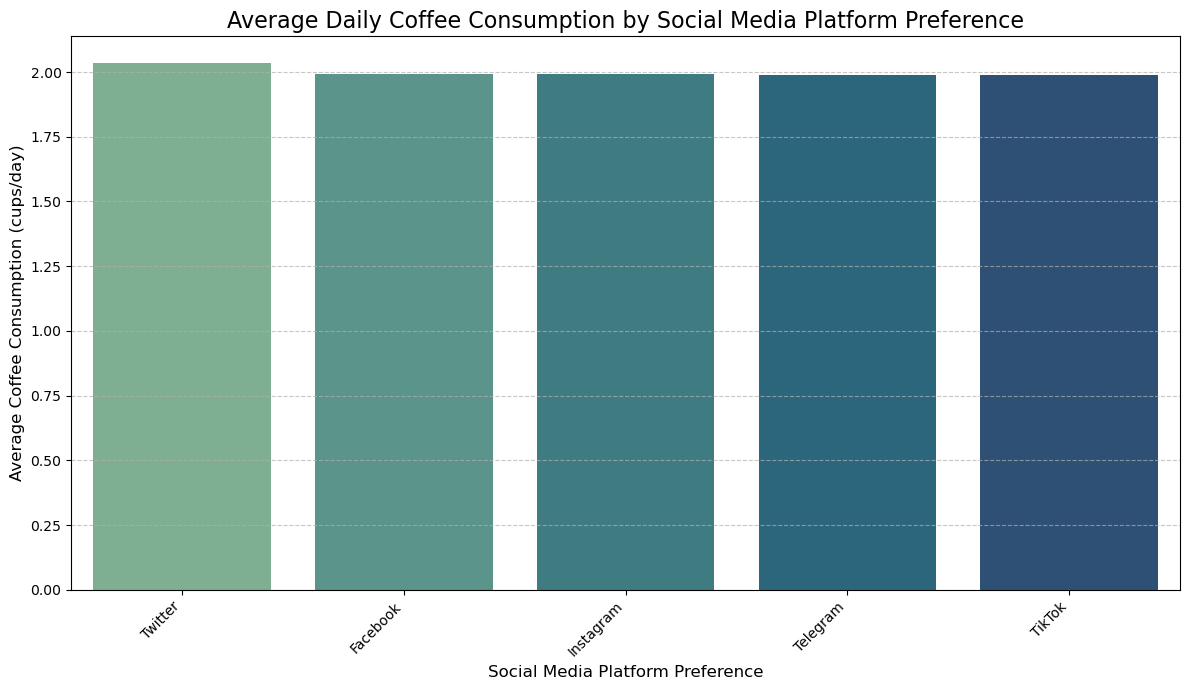

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 7))
sns.barplot(x=avg_coffee_by_platform.index, y=avg_coffee_by_platform.values, palette='crest')
plt.title('Average Daily Coffee Consumption by Social Media Platform Preference', fontsize=16)
plt.xlabel('Social Media Platform Preference', fontsize=12)
plt.ylabel('Average Coffee Consumption (cups/day)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# visualizing coffee consumption vs social media apps using boxplot 

/tmp/ipykernel_6462/1326286611.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='social_platform_preference', y='coffee_consumption_per_day', data=df, palette='crest')


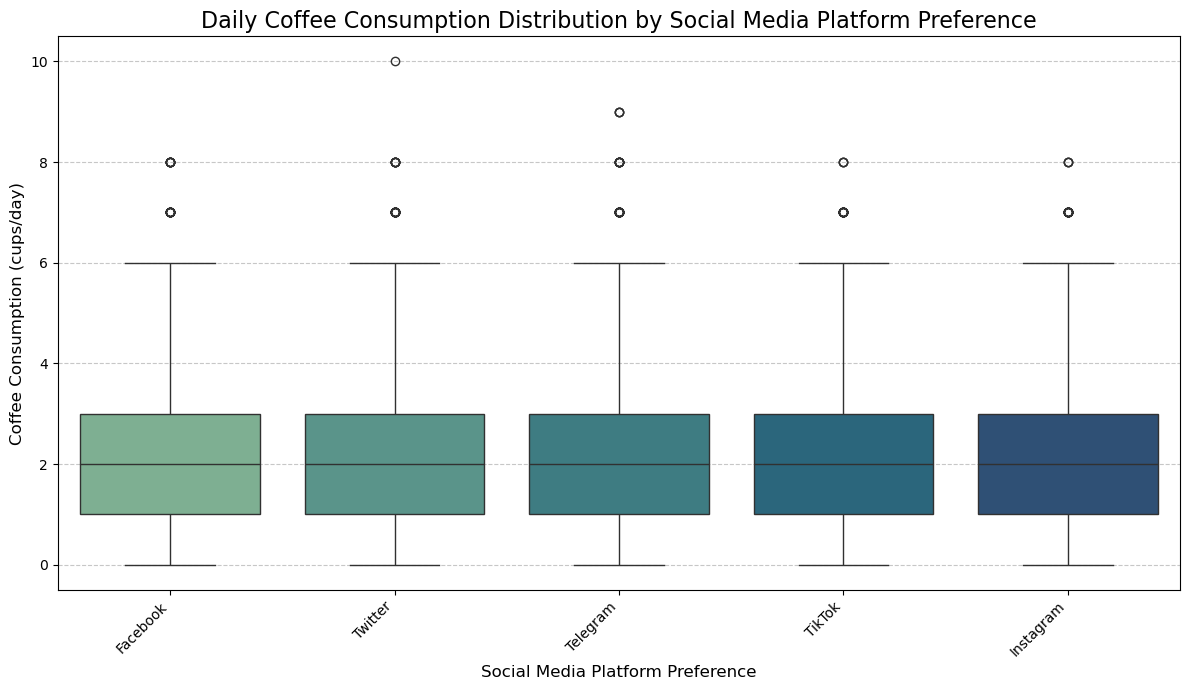

In [23]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='social_platform_preference', y='coffee_consumption_per_day', data=df, palette='crest')
plt.title('Daily Coffee Consumption Distribution by Social Media Platform Preference', fontsize=16)
plt.xlabel('Social Media Platform Preference', fontsize=12)
plt.ylabel('Coffee Consumption (cups/day)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# key observations

-> since there are very subtle differences in the average daily coffee consumption across all platforms appears to be quite similar, generally hovering between 1.9 and 2.0 cups per day. This suggests that a person's preferred social media platform might not be a primary driver of large variations in coffee intake.
Twitter users show a slightly higher average consumption, while TikTok users, surprisingly, exhibit a marginally lower average. However, these differences are numerically very small.

->For all platforms, the mean and median coffee consumption values are very close. This indicates that the data distribution for coffee consumption within each platform is relatively symmetrical and not heavily skewed by extreme values.

->**Distribution and Variability (Box Plots):**
-The "width" of the boxes (Interquartile Range) for most platforms is relatively similar, suggesting comparable variability in coffee consumption among the middle 50% of users. The boxes are not extremely narrow, indicating that there is still a range of coffee habits within each platform, rather than everyone consuming the exact same amount.
-Outliers: The presence of individual data points (circles/dots) outside the whiskers in the box plots indicates that there are some users who consume significantly more or less coffee than the majority within their respective platform preference groups. These are considered outliers, representing more extreme coffee consumption habits.

->**User Base Consistency:** The number of users preferring each social media platform is fairly consistent across the dataset, ranging within 100-200 users of each other. This implies that the averages calculated are based on a sufficiently similar sample size for each platform, adding to the reliability of the comparisons.